In [13]:
# Importing all required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC


In [16]:
# Load the preprocessed dataset
df = pd.read_csv(r"C:\Users\deepu\Downloads\AI_Resume_Screening_After_Preprocessing.csv")

# Display first 5 rows
df.head()


,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",1.640557,B.Sc,NaN,0,0,1.080895,0.887684,0.765286
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",1.640557,MBA,Google ML,2,0,1.432808,-1.279664,0.765286
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",-1.252275,MBA,Deep Learning Specialization,1,0,-0.357187,0.578063,-0.665155
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",0.676280,B.Tech,AWS Certified,0,0,-1.438840,-1.589285,0.526879
4,5,Julie Hill,"SQL, React, Java",-0.287997,PhD,NaN,3,0,0.323242,1.197305,0.765286


In [19]:
y = df['Job Role']  
X = df.drop(['Job Role', 'Resume_ID', 'Name'], axis=1)

for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])


In [21]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data split completed successfully!")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


✅ Data split completed successfully!
Training set size: (795, 8)
Testing set size: (199, 8)


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("✅ Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt) * 100)
print(classification_report(y_test, y_pred_dt))


✅ Decision Tree Accuracy: 85.42713567839196
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.73      1.00      0.84        51
           2       0.97      0.61      0.75        51
           3       0.80      0.80      0.80        46

    accuracy                           0.85       199
   macro avg       0.88      0.85      0.85       199
weighted avg       0.88      0.85      0.85       199



In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=120, max_depth=6, criterion='gini', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("✅ Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf) * 100)
print(classification_report(y_test, y_pred_rf))


✅ Random Forest Accuracy: 61.80904522613066
              precision    recall  f1-score   support

           0       0.58      0.82      0.68        51
           1       0.59      0.92      0.72        51
           2       0.64      0.27      0.38        51
           3       0.77      0.43      0.56        46

    accuracy                           0.62       199
   macro avg       0.65      0.61      0.59       199
weighted avg       0.64      0.62      0.59       199



In [26]:
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"✅ SVM Accuracy: {acc_svm*100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


✅ SVM Accuracy: 47.24%

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.82      0.54        51
           1       0.50      0.80      0.62        51
           2       0.00      0.00      0.00        51
           3       1.00      0.24      0.39        46

    accuracy                           0.47       199
   macro avg       0.47      0.47      0.38       199
weighted avg       0.46      0.47      0.38       199



C:\Users\deepu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\deepu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\deepu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [27]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"✅ Logistic Regression Accuracy: {acc_lr*100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


✅ Logistic Regression Accuracy: 39.20%

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.71      0.53        51
           1       0.49      0.59      0.54        51
           2       0.35      0.22      0.27        51
           3       0.05      0.02      0.03        46

    accuracy                           0.39       199
   macro avg       0.33      0.38      0.34       199
weighted avg       0.34      0.39      0.35       199



C:\Users\deepu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
ab_model = AdaBoostClassifier(n_estimators=50, learning_rate=0.6, random_state=42)
ab_model.fit(X_train, y_train)
y_pred_ab = ab_model.predict(X_test)

acc_ab = accuracy_score(y_test, y_pred_ab)
print(f"✅ AdaBoost Accuracy: {acc_ab*100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred_ab))


✅ AdaBoost Accuracy: 43.22%

Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.29      0.27        51
           1       0.57      1.00      0.72        51
           2       0.43      0.39      0.41        51
           3       0.00      0.00      0.00        46

    accuracy                           0.43       199
   macro avg       0.31      0.42      0.35       199
weighted avg       0.32      0.43      0.36       199



C:\Users\deepu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\deepu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\deepu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
gb = GradientBoostingClassifier(
    n_estimators=30,       
    learning_rate=0.05,    
    max_depth=2,           
    subsample=0.6,         
    random_state=42
)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
gb_acc = accuracy_score(y_test, y_pred_gb) * 100
print(f"✅ Gradient Boosting Accuracy: {gb_acc:.2f}%")
print(classification_report(y_test, y_pred_gb))


✅ Gradient Boosting Accuracy: 91.46%
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        51
           1       1.00      1.00      1.00        51
           2       0.97      0.69      0.80        51
           3       0.83      0.98      0.90        46

    accuracy                           0.91       199
   macro avg       0.92      0.92      0.91       199
weighted avg       0.92      0.91      0.91       199



In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(
    n_neighbors=3,     
    weights='distance',
    p=2               
)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_acc = accuracy_score(y_test, y_pred_knn) * 100
print(f"✅ KNN Accuracy: {knn_acc:.2f}%")
print(classification_report(y_test, y_pred_knn))


✅ KNN Accuracy: 93.47%
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        51
           1       0.98      0.98      0.98        51
           2       0.88      0.88      0.88        51
           3       0.89      0.91      0.90        46

    accuracy                           0.93       199
   macro avg       0.93      0.93      0.93       199
weighted avg       0.94      0.93      0.93       199



In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


acc_dt = round(accuracy_score(y_test, y_pred_dt) * 100, 2)
acc_rf = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
acc_knn = round(accuracy_score(y_test, y_pred_knn) * 100, 2)  
acc_svm = round(accuracy_score(y_test, y_pred_svm) * 100, 2)
acc_lr = round(accuracy_score(y_test, y_pred_lr) * 100, 2)
acc_gb = round(accuracy_score(y_test, y_pred_gb) * 100, 2)
acc_ab = round(accuracy_score(y_test, y_pred_ab) * 100, 2)

comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Logistic Regression', 'Gradient Boosting', 'AdaBoost'],
    'Accuracy (%)': [acc_dt, acc_rf, acc_knn, acc_svm, acc_lr, acc_gb, acc_ab]
}).sort_values(by='Accuracy (%)', ascending=False).reset_index(drop=True)

print("📊 Overall Model Comparison:\n")
print(comparison)

📊 Overall Model Comparison:

                 Model  Accuracy (%)
0                  KNN         93.47
1    Gradient Boosting         91.46
2        Decision Tree         85.43
3        Random Forest         61.81
4                  SVM         47.24
5             AdaBoost         43.22
6  Logistic Regression         39.20


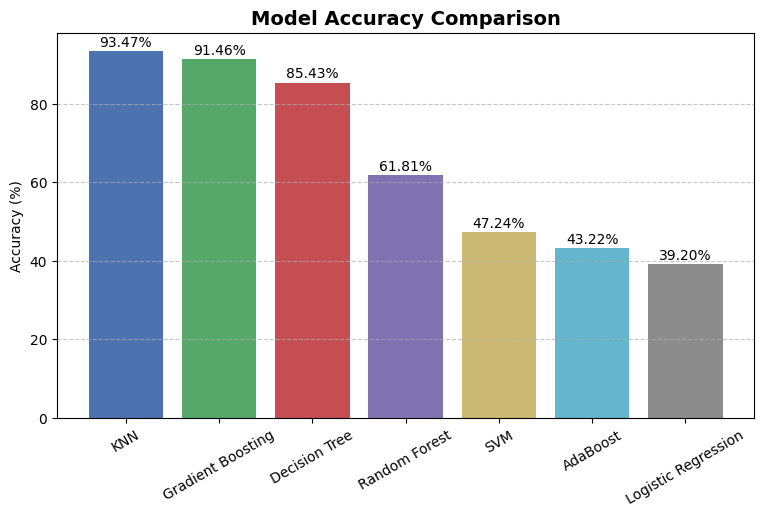

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
bars = plt.bar(comparison['Model'], comparison['Accuracy (%)'], color=['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD', '#8C8C8C'])
plt.title("Model Accuracy Comparison", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{bar.get_height():.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()


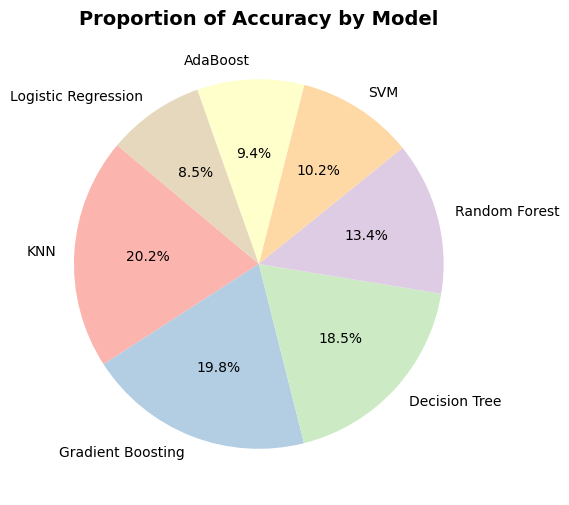

In [61]:
plt.figure(figsize=(6,6))
plt.pie(comparison['Accuracy (%)'], labels=comparison['Model'],
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title("Proportion of Accuracy by Model", fontsize=14, fontweight='bold')
plt.show()


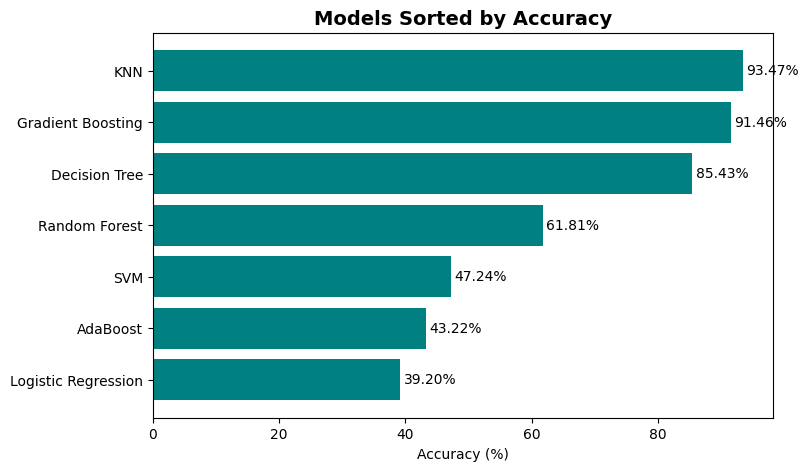

In [62]:
plt.figure(figsize=(8,5))
sorted_comp = comparison.sort_values('Accuracy (%)', ascending=True)
plt.barh(sorted_comp['Model'], sorted_comp['Accuracy (%)'], color='teal')
plt.title("Models Sorted by Accuracy", fontsize=14, fontweight='bold')
plt.xlabel("Accuracy (%)")

# Add accuracy labels
for i, (acc, model) in enumerate(zip(sorted_comp['Accuracy (%)'], sorted_comp['Model'])):
    plt.text(acc + 0.5, i, f'{acc:.2f}%', va='center', fontsize=10)

plt.show()
